In [6]:
import pandas as pd
data = pd.read_csv(r'../data-sample/TaxiData-Sample', header=None)
data.columns = ['VehicleNum', 'Stime', 'Lng', 'Lat', 'OpenStatus', 'Speed']
data['Stime'] = pd.to_datetime(data['Stime'])

C:\Users\Beck\AppData\Local\Temp\ipykernel_15952\1172917081.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Stime'] = pd.to_datetime(data['Stime'])


In [4]:
TaxiOD = pd.read_csv(r'../data-sample/TaxiOD.csv')
TaxiOD.columns = [
    'VehicleNum', 'Stime', 'SLng', 'SLat', 'ELng', 'ELat', 'Etime'
]
TaxiOD.head()

,VehicleNum,Stime,SLng,SLat,ELng,ELat,Etime
0,22223,00:03:23,114.167465,22.562468,114.225235,22.552750,00:10:48
1,22223,00:11:33,114.227150,22.554167,114.229218,22.560217,00:15:19
2,22223,00:17:13,114.231354,22.562166,114.255798,22.590967,00:29:06
3,22223,00:36:45,114.240196,22.563650,114.119965,22.566668,00:54:42
4,22223,01:01:14,114.135414,22.575933,114.166748,22.608267,01:08:17


In [8]:
hourcout = data.groupby(data['Stime'].apply(lambda r : r.hour))['VehicleNum'].count().reset_index()
hourcout.head()

,Stime,VehicleNum
0,0,68745
1,1,63142
2,2,60680
3,3,57494
4,4,57060


(0.0, 80000.0)

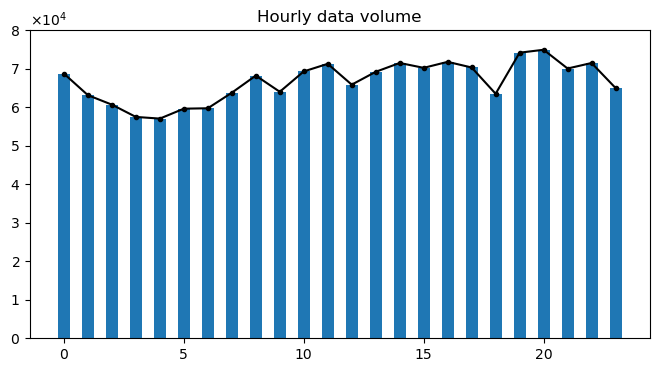

In [15]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
fig = plt.figure(1, (8, 4))
ax = plt.subplot(111)
plt.sca(ax)
plt.plot(hourcout['Stime'], hourcout['VehicleNum'], 'k-', hourcout['Stime'], hourcout['VehicleNum'], 'k.')
plt.bar(hourcout['Stime'], hourcout['VehicleNum'], width=0.5)
y_formatter = ScalarFormatter(useMathText=True)
y_formatter.set_powerlimits((-2, 2))
ax.yaxis.set_major_formatter(y_formatter)
plt.title('Hourly data volume')
plt.ylim(0, 80000)